# 手势识别

Author:Kevin<br>
Date:20190710

## 开山鼻祖---CNN

### CNN:Convolutional Neural Networks,卷积神经网络

<font size=4 face="微软雅黑">卷积神经网络最早出现于LeNet-5中，由Yann LeCun卷积神经网络之父开创。</font>

<font size=4 face="微软雅黑"> 卷积的优点：<br>
+ 局部连接：每个神经元仅与输入神经元的一块区域连接，这块局部区域称作感受野（receptive field）。在图像卷积操作中，即神经元在空间维度（spatial dimension，即上图示例H和W所在的平面）是局部连接，但在深度上是全部连接。对于二维图像本身而言，也是局部像素关联较强。这种局部连接保证了学习后的过滤器能够对于局部的输入特征有最强的响应。局部连接的思想，也是受启发于生物学里面的视觉系统结构，视觉皮层的神经元就是局部接受信息的。<br>
+ 权重共享：计算同一个深度切片的神经元时采用的滤波器是共享的。例上图中计算o[:,:,0]的每个每个神经元的滤波器均相同，都为W0，这样可以很大程度上减少参数。共享权重在一定程度上讲是有意义的，例如图片的底层边缘特征与特征在图中的具体位置无关。但是在一些场景中是无意的，比如输入的图片是人脸，眼睛和头发位于不同的位置，希望在不同的位置学到不同的特征 。请注意权重只是对于同一深度切片的神经元是共享的，在卷积层，通常采用多组卷积核提取不同特征，即对应不同深度切片的特征，不同深度切片的神经元权重是不共享。另外，偏重对同一深度切片的所有神经元都是共享的。</font>

### <font size=4 face="微软雅黑">卷积的动态图演示</font>

![](https://pic3.zhimg.com/v2-7fce29335f9b43bce1b373daa40cccba_b.gif)

###  池化Pooling

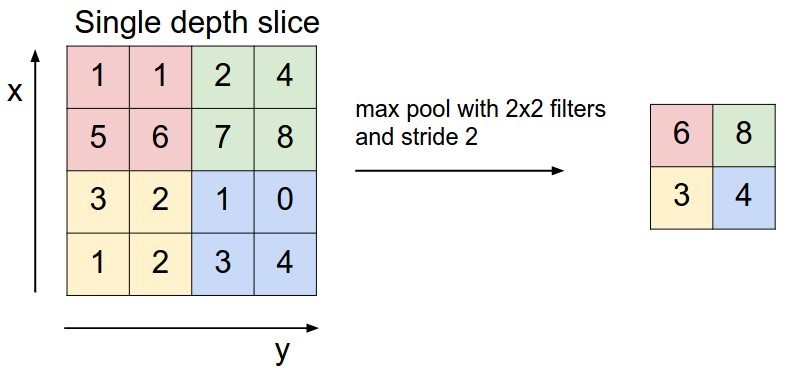

![](https://mlnotebook.github.io/img/CNN/poolfig.gif)

### 全连接层

<font size=4 face="微软雅黑">全连接层（fully connected layers，FC）在整个卷积神经网络中起到“分类器”的作用。如果说卷积层、池化层和激活函数层等操作是将原始数据映射到隐层特征空间的话，全连接层则起到将学到的“分布式特征表示”映射到样本标记空间的作用。在实际使用中，全连接层可由卷积操作实现：对前层是全连接的全连接层可以转化为卷积核为1x1的卷积；而前层是卷积层的全连接层可以转化为卷积核为hxw的全局卷积，h和w分别为前层卷积结果的高和宽。

## 目标识别

<font size=4 face="微软雅黑">目标识别分一阶段one stage和二阶段two stage，一刀流和二刀流。<br>
**一阶段one stage**:不需要产生候选框，直接将目标框定位的问题转化为回归问题处理。常见的算法有YOLO、SSD等。<br>
**二阶段two stage**:首先由算法生成一系列作为样本的候选框，再通过卷积神经网络进行样本分类。常见的算法有R-CNN、Fast R-CNN、Faster R-CNN等。<br>
</font>

<font size=4 face="微软雅黑">目标识别的两个大牛：**何凯明**与**Ross Girshick**，两人被誉为北乔峰南慕容！</font>

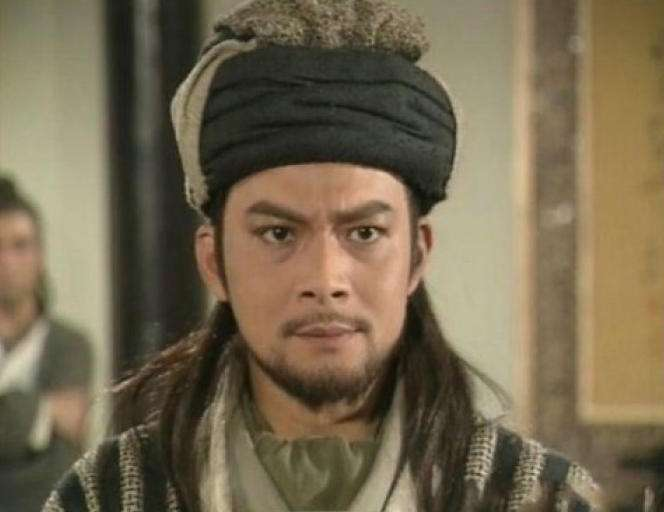

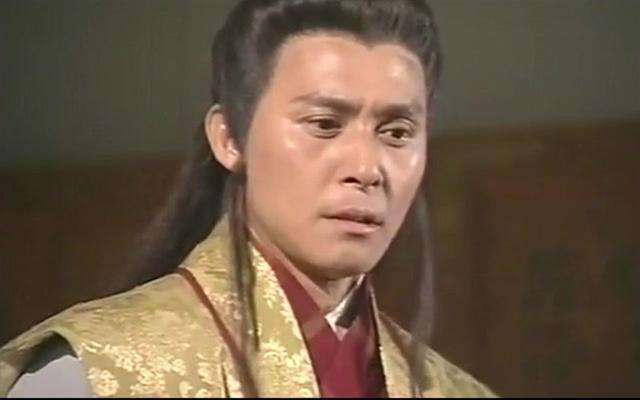

### 一阶段one stage:Yolo系列

<font size=4>Yolov1:You Only Look Once: Unified, Real-Time Object Detection <br>
Yolov2(Yolo9000):YOLO9000: Better, Faster, Stronger<br>
Yolov3</font>

<font size=4>Yolov1采用卷积网络来提取特征，然后使用全连接层来得到预测值。网络结构参考GooLeNet模型，包含24个卷积层和2个全连接层，如图8所示。对于卷积层，主要使用1x1卷积来做channle reduction，然后紧跟3x3卷积。对于卷积层和全连接层，采用Leaky ReLU激活函数：max(x, 0.1x) 。但是最后一层却采用线性激活函数。

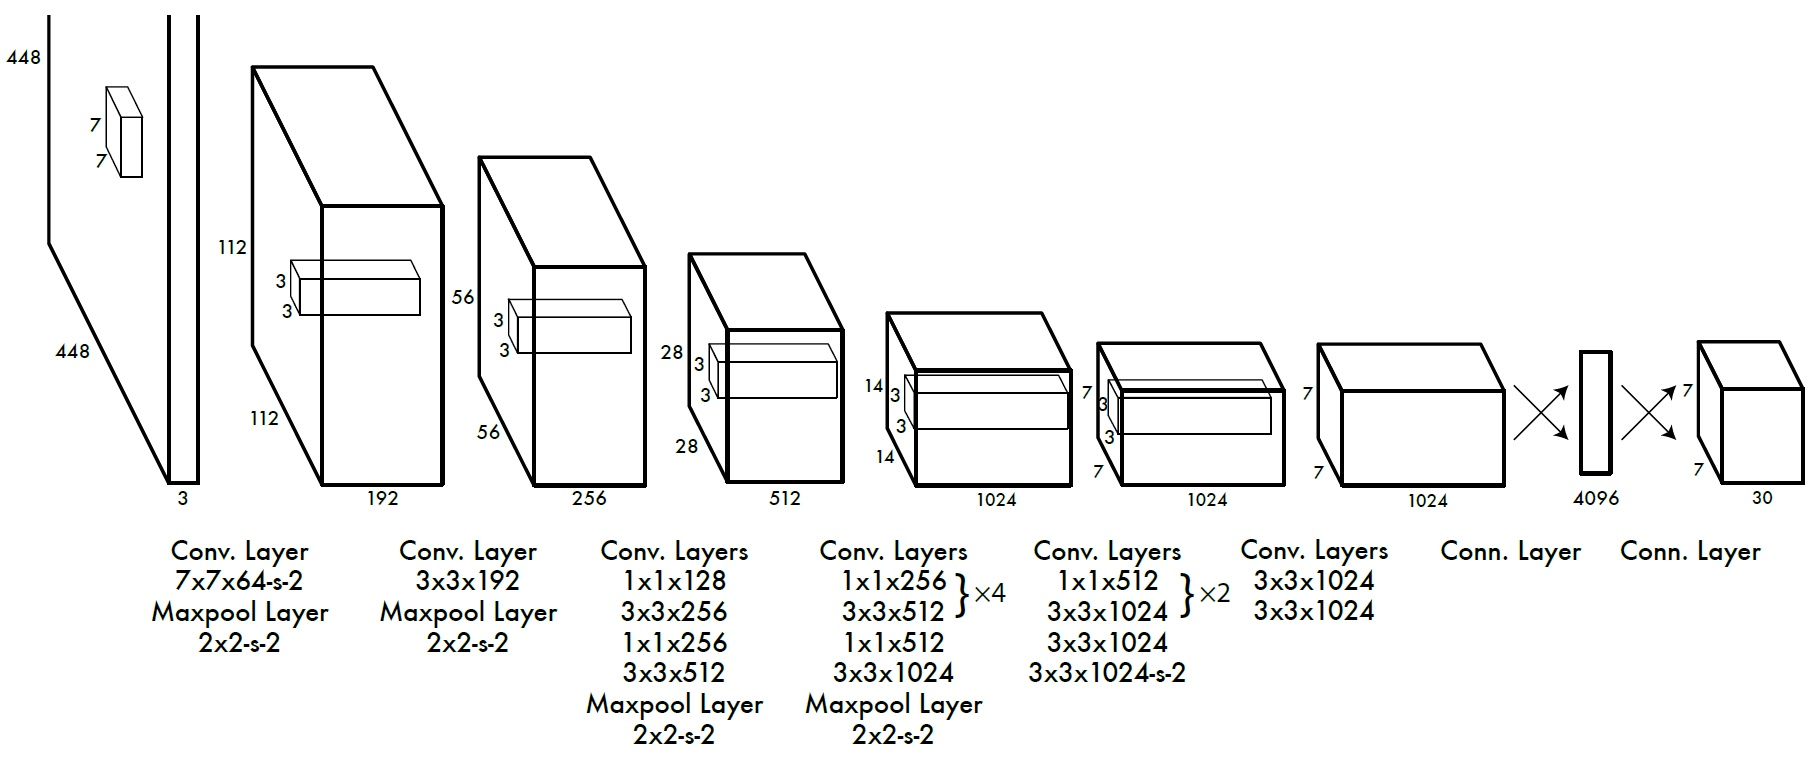

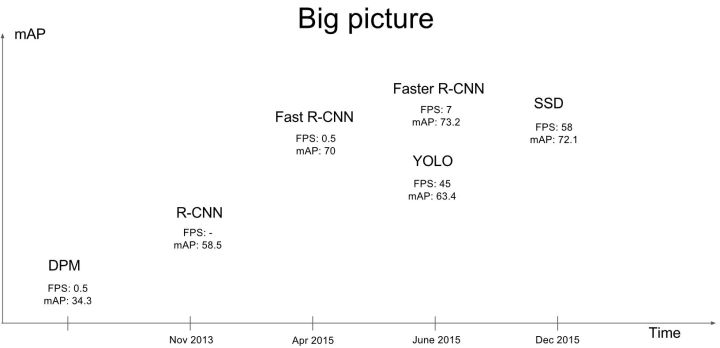

<font size=4>Yolov2相比于Yolov1的改进点:<br>
+ Batch Normalization可以提升模型收敛速度，而且可以起到一定正则化效果，降低模型的过拟合。在YOLOv2中，每个卷积层后面都添加了Batch Normalization层，并且不再使用droput。使用Batch Normalization后，YOLOv2的mAP提升了2.4%。<br>
+ YOLOv2增加了在ImageNet数据集上使用448*448输入来finetune分类网络这一中间过程（10 epochs），这可以使得模型在检测数据集上finetune之前已经适用高分辨率输入。使用高分辨率分类器后，YOLOv2的mAP提升了约4%。<br>
+ 使用anchor boxes之后，YOLOv2的召回率大大提升，由原来的81%升至88%。YOLOv2借鉴了Faster R-CNN中RPN网络的先验框（anchor boxes，prior boxes，SSD也采用了先验框）策略。RPN对CNN特征提取器得到的特征图（feature map）进行卷积来预测每个位置的边界框以及置信度（是否含有物体），并且各个位置设置不同尺度和比例的先验框，所以RPN预测的是边界框相对于先验框的offsets值（其实是transform值，详细见Faster R_CNN论文），采用先验框使得模型更容易学习。<br>
+ YOLOv2采用k-means聚类方法对训练集中的边界框做了聚类分析。因为设置先验框的主要目的是为了使得预测框与ground truth的IOU更好。

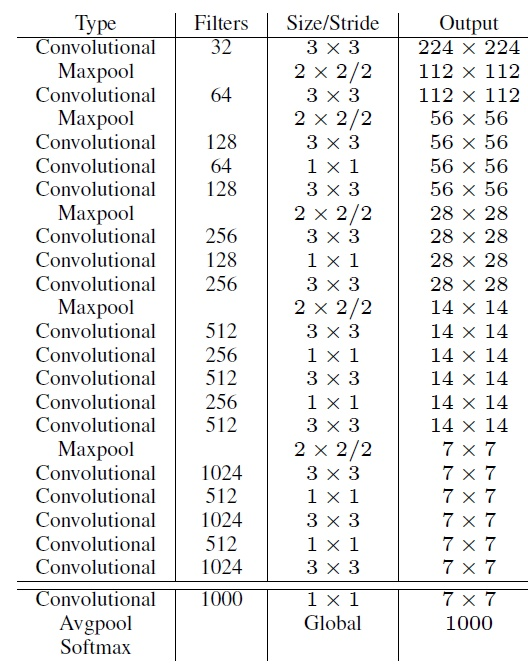

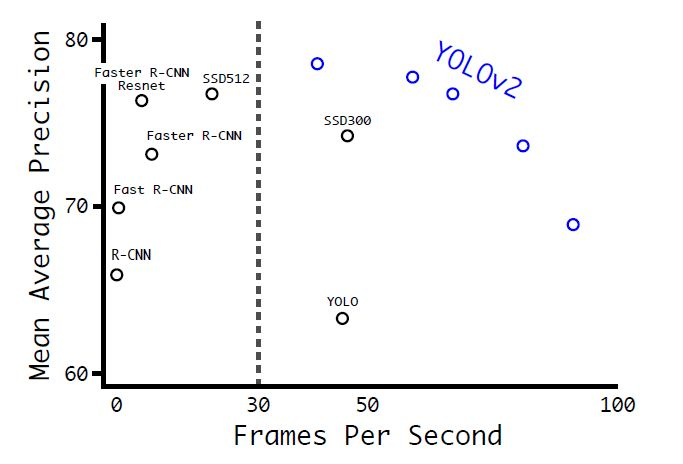

<font size=4>Yolov3相比于Yolov2的改进点：<br>
YOLOv3最大的变化包括两点：使用残差模型和采用FPN架构。

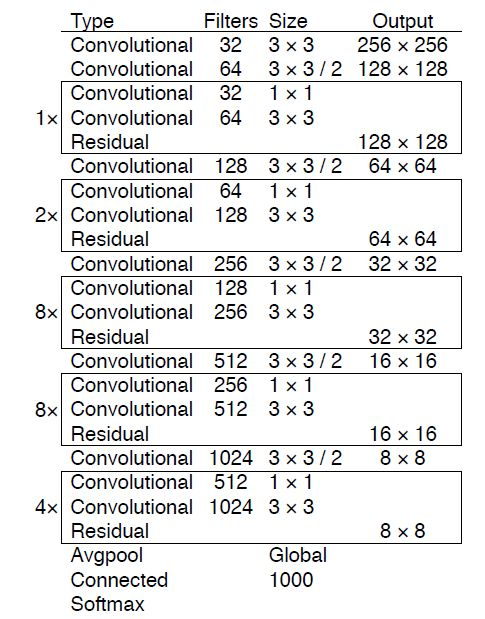

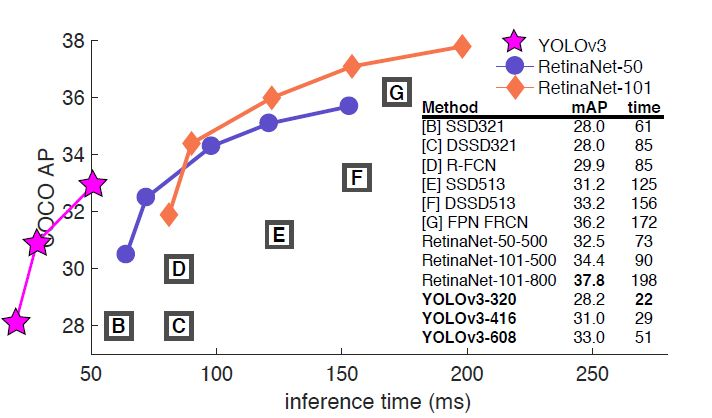

<font size=4>Yolo系列基于[Darknet](https://pjreddie.com/darknet/)后端，纯C语言写的。

<font size=4>SSD：Single Shot Detection，采用VGG16为基础框架，借鉴Fast RCNN中的anchor。

### 二阶段two stage:RCNN系列

<font size=4>RCNN的进化论：RCNN>>>SPP Net>>>Fast RCNN>>>Faster RCNN

<font size=4>RCNN:RCNN算法分为4个步骤 <br>
- 候选区域生成： 一张图像生成1K~2K个候选区域 （采用Selective Search 方法）
- 特征提取： 将第一步中产生的每个Region Proposal分别resize后（归一化为227×227）作为CNN网络的输入,对每个候选区域，使用深度卷积网络提取特征 （CNN） 
- 类别判断： 特征送入每一类的SVM 分类器，判别是否属于该类 
- 位置精修： 使用回归器精细修正候选框位置 

<font size=4>网络架构两个可选方案：第一选择经典的Alexnet；第二选择VGG16。

<font size=4>SPP Net改进：<br>
SPP Net是使用原始图像作为CNN网络的输入来计算feature map（R-CNN中是每个Region Proposal都要经历一次CNN计算），这样就大大减少了计算量。另外，SPP net中Region Proposal仍然是通过选择性搜索等算法在输入图像中生成的，通过映射的方式得到feature map中对应的区域，并对Region Proposal在feature map中对应区域做空间金字塔池化。通过空间金字塔池化操作，对于任意尺寸的候选区域，经过SPP后都会得到固定长度的特征向量。

<font size=4>Fast RCNN改进：<br>
1. 比R-CNN和SPP net更高的检测精度（mAP）；

2. 训练过程是端到端的（Sigle-stage）,并使用了一个多任务的损失函数（也即将边框回归直接加入到CNN网络中后，Fast R-CNN网络的损失函数包含了Softmax的损失和Regressor的损失）；

3. 训练过程可以更新所有的网络层；

<font size=4>Faster RCNN改进：<br>
用RPN代替SS

### 其他牛逼网络结构

<font size=4>Retina Network;Thunder Network;Center Network;Corner Network;Cascade Network;Light Head Network;DSSD;FSSD,ShuffleNet,MobileNet......

### 目标检测目前的优化方向

<font size=4>1、基于目标检测的backbone和特征提取:
目标检测的backbone一般基于ImageNet预训练的图像分类网络。图像分类问题只关注分类和感受视野，不用关注物体定位，但是目标检测领域同时很关注空间信息。如果下采样过多，会导致最后的feature map很小，小目标很容易漏掉。很多基础架构网络，比如ResNet、Xception、DenseNet、FPN、DetNet、R-CNN，PANet、等神经网络提取图像的上下文信息，不断在特征提取方向优化。<br>
2、基于优化的算法:
包括UnitBox，IoU-Net[1]，旷视科技ECCV2018有一篇论文是引入IoU-Net，其能预测检测到的边界框和它们对应的真实目标框之间的 IoU，使得该网络能像其分类模块一样，对检测框的定位精确程度有所掌握，神经网络在Backbone引入IoU-Net做边界修订。<br>
3、基于优化损失函数的方法:
包括L1和L2，Focal loss等。<br>
4、基于优化NMS的方法:
包括Soft-NMS,Softer-NMS,以及Relation Netwrok，ConvNMS，NMS Network，Yes-Net等，详细可参看本人一篇笔记《目标检测算法中检测框合并策略技术综述》[2]。<br>
5、基于Anchor生成的算法:
比如Sliding window、Region Proposal Network (RPN) 、CornerNet、meta-anchor等。<br>
6、one-shot learning以及zero shot learning:
都属于迁移学习领域，主要研究的是网络少样本精准分类问题，单样本学习能力。CVPR2019有一篇基于one-shot learning[7]，值得关注。

## 各种网络架构介绍

### LeNet-5 

<font size=4>60k参数。网络基本架构为：conv1 (6) -> pool1 -> conv2 (16) -> pool2 -> fc3 (120) -> fc4 (84) -> fc5 (10) -> softmax。括号中的数字代表通道数，网络名称中有5表示它有5层conv/fc层。当时，LeNet-5被成功用于ATM以对支票中的手写数字进行识别。LeNet取名源自其作者姓LeCun。

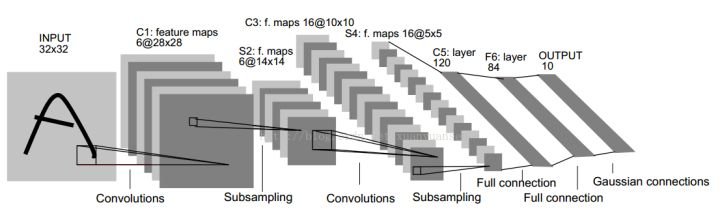

### AlexNet

<font size=4>60M参数，ILSVRC 2012的冠军网络。网络基本架构为：conv1 (96) -> pool1 -> conv2 (256) -> pool2 -> conv3 (384) -> conv4 (384) -> conv5 (256) -> pool5 -> fc6 (4096) -> fc7 (4096) -> fc8 (1000) -> softmax。AlexNet有着和LeNet-5相似网络结构，但更深、有更多参数。conv1使用11×11的滤波器、步长为4使空间大小迅速减小(227×227 -> 55×55)。AlexNet的关键点是：(1). 使用了ReLU激活函数，使之有更好的梯度特性、训练更快。(2). 使用了随机失活(dropout)。(3). 大量使用数据扩充技术。AlexNet的意义在于它以高出第二名10%的性能取得了当年ILSVRC竞赛的冠军，这使人们意识到卷积神经网络的优势。此外，AlexNet也使人们意识到可以利用GPU加速卷积神经网络训练。AlexNet取名源自其作者名Alex。

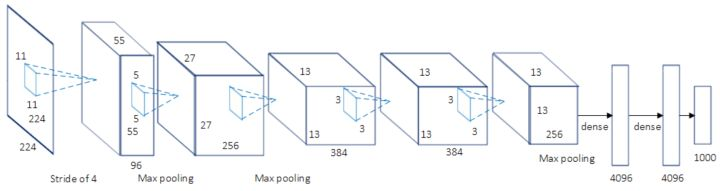

### VGG-16/VGG-19

<font size=4>138M参数，ILSVRC 2014的亚军网络。VGG-16的基本架构为：conv1^2 (64) -> pool1 -> conv2^2 (128) -> pool2 -> conv3^3 (256) -> pool3 -> conv4^3 (512) -> pool4 -> conv5^3 (512) -> pool5 -> fc6 (4096) -> fc7 (4096) -> fc8 (1000) -> softmax。 ^3代表重复3次。VGG网络的关键点是：(1). 结构简单，只有3×3卷积和2×2汇合两种配置，并且重复堆叠相同的模块组合。卷积层不改变空间大小，每经过一次汇合层，空间大小减半。(2). 参数量大，而且大部分的参数集中在全连接层中。网络名称中有16表示它有16层conv/fc层。(3). 合适的网络初始化和使用批量归一(batch normalization)层对训练深层网络很重要。在原论文中无法直接训练深层VGG网络，因此先训练浅层网络，并使用浅层网络对深层网络进行初始化。在BN出现之后，伴随其他技术，后续提出的深层网络可以直接得以训练。VGG-19结构类似于VGG-16，有略好于VGG-16的性能，但VGG-19需要消耗更大的资源，因此实际中VGG-16使用得更多。由于VGG-16网络结构十分简单，并且很适合迁移学习，因此至今VGG-16仍在广泛使用。VGG-16和VGG-19取名源自作者所处研究组名(Visual Geometry Group)。

### GoogLeNet

<font size=4> 5M参数，ILSVRC 2014的冠军网络。GoogLeNet试图回答在设计网络时究竟应该选多大尺寸的卷积、或者应该选汇合层。其提出了Inception模块，同时用1×1、3×3、5×5卷积和3×3汇合，并保留所有结果。网络基本架构为：conv1 (64) -> pool1 -> conv2^2 (64, 192) -> pool2 -> inc3 (256, 480) -> pool3 -> inc4^5 (512, 512, 512, 528, 832) -> pool4 -> inc5^2 (832, 1024) -> pool5 -> fc (1000)。GoogLeNet的关键点是：(1). 多分支分别处理，并级联结果。(2). 为了降低计算量，用了1×1卷积降维。GoogLeNet使用了全局平均汇合替代全连接层，使网络参数大幅减少。GoogLeNet取名源自作者所处单位(Google)，其中L大写是为了向LeNet致敬，而Inception的名字来源于盗梦空间中的"we need to go deeper"梗。

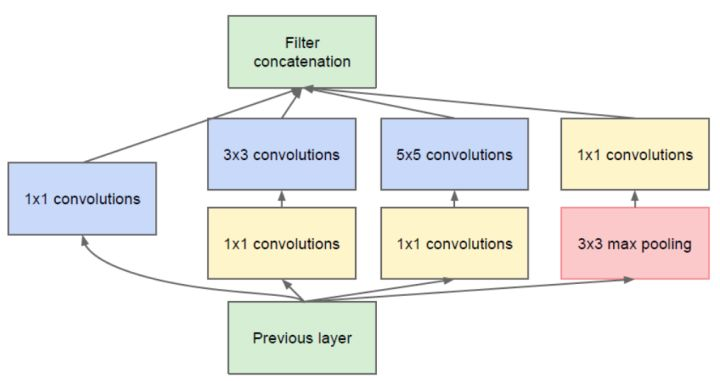

### Inception v3/v4

<font size=4>在GoogLeNet的基础上进一步降低参数。其和GoogLeNet有相似的Inception模块，但将7×7和5×5卷积分解成若干等效3×3卷积，并在网络中后部分把3×3卷积分解为1×3和3×1卷积。这使得在相似的网络参数下网络可以部署到42层。此外，Inception v3使用了批量归一层。Inception v3是GoogLeNet计算量的2.5倍，而错误率较后者下降了3%。Inception v4在Inception模块基础上结合了residual模块(见下文)，进一步降低了0.4%的错误率。

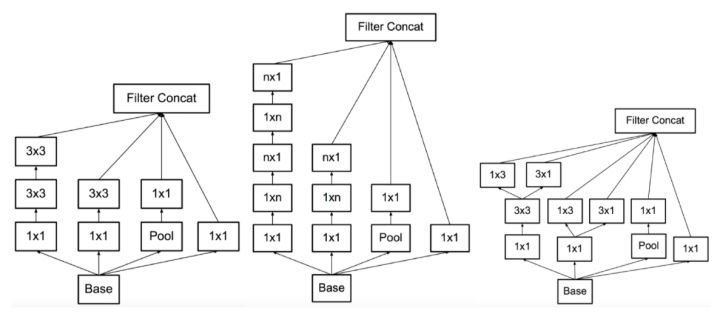

### ResNet

<font size=4>ILSVRC 2015的冠军网络。ResNet旨在解决网络加深后训练难度增大的现象。其提出了residual模块，包含两个3×3卷积和一个短路连接(左图)。短路连接可以有效缓解反向传播时由于深度过深导致的梯度消失现象，这使得网络加深之后性能不会变差。短路连接是深度学习又一重要思想，除计算机视觉外，短路连接也被用到了机器翻译、语音识别/合成领域。此外，具有短路连接的ResNet可以看作是许多不同深度而共享参数的网络的集成，网络数目随层数指数增加。ResNet的关键点是：(1). 使用短路连接，使训练深层网络更容易，并且重复堆叠相同的模块组合。(2). ResNet大量使用了批量归一层。(3). 对于很深的网络(超过50层)，ResNet使用了更高效的瓶颈(bottleneck)结构(右图)。ResNet在ImageNet上取得了超过人的准确率。

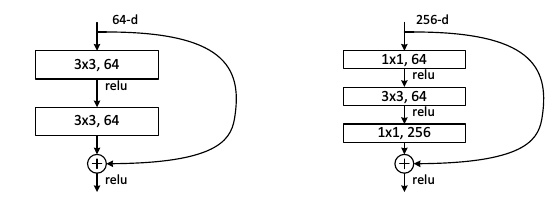

### DenseNet

<font size=4>同ResNet一样其目的也是避免梯度消失。和residual模块不同，dense模块中任意两层之间均有短路连接。也就是说，每一层的输入通过级联(concatenation)包含了之前所有层的结果，即包含由低到高所有层次的特征。和之前方法不同的是，DenseNet中卷积层的滤波器数很少。DenseNet只用ResNet一半的参数即可达到ResNet的性能。实现方面，作者在大会报告指出，直接将输出级联会占用很大GPU存储。后来，通过共享存储，可以在相同的GPU存储资源下训练更深的DenseNet。但由于有些中间结果需要重复计算，该实现会增加训练时间。

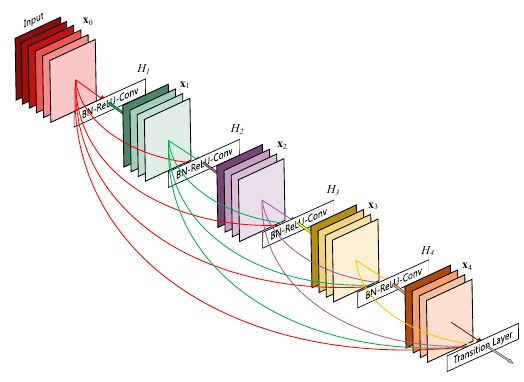

### ResNeXt

<font size=4>ResNet的另一改进。传统的方法通常是靠加深或加宽网络来提升性能，但计算开销也会随之增加。ResNeXt旨在不改变模型复杂度的情况下提升性能。受精简而高效的Inception模块启发，ResNeXt将ResNet中非短路那一分支变为多个分支。和Inception不同的是，每个分支的结构都相同。ResNeXt的关键点是：(1). 沿用ResNet的短路连接，并且重复堆叠相同的模块组合。(2). 多分支分别处理。(3). 使用1×1卷积降低计算量。其综合了ResNet和Inception的优点。此外，ResNeXt巧妙地利用分组卷积进行实现。ResNeXt发现，增加分支数是比加深或加宽更有效地提升网络性能的方式。ResNeXt的命名旨在说明这是下一代(next)的ResNet

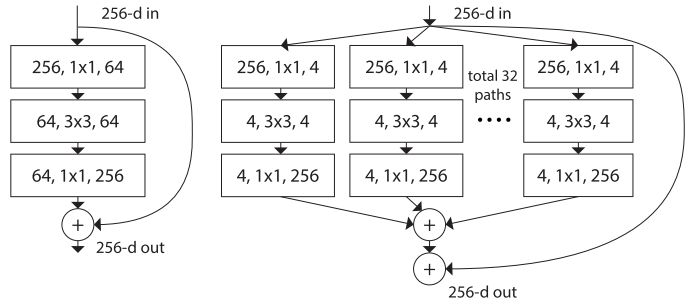

### SENet

<font size=4>ILSVRC 2017的冠军网络。SENet通过额外的分支(gap-fc-fc-sigm)来得到每个通道的[0, 1]权重，自适应地校正原各通道激活值响应。以提升有用的通道响应并抑制对当前任务用处不大的通道响应。

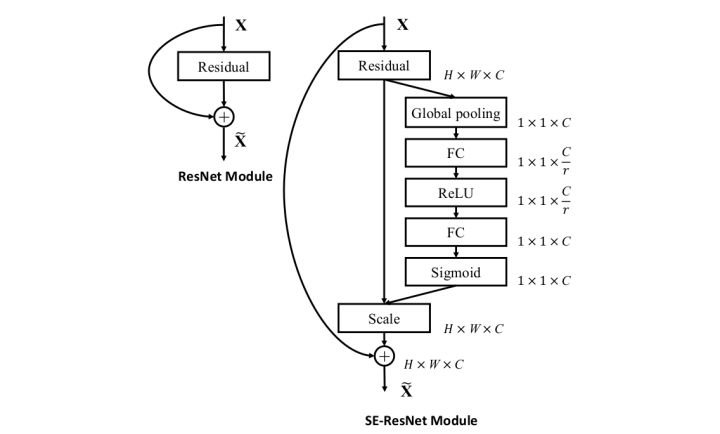

<font size=6><center>End Thank you!</center></font>